# Stylometry Demonstration
This is a notebook we are using to do some basic analysis of style in multiple text files

## File naming convention
Author_title.txt

## Opening multiple files:

In [53]:
## import our libraries that we use
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
author_labels = []
titles = []
texts = []

for root, dirs, files in os.walk('corpus'):
    for fname in files:
        with open(os.path.join(root, fname), 'r', encoding='utf8') as rf:
            text = rf.read()
            texts.append(text)
            
            # get the metadata:
            meta_data = fname[:-4].split("_")
            author_labels.append(meta_data[0])
            titles.append(meta_data[1])
           
print(author_labels)

['doyle', 'collins', 'doyle', 'doyle', 'collins']


In [55]:
vectorizer = TfidfVectorizer(max_features=1000, use_idf=False)

In [56]:
doc_vecs = vectorizer.fit_transform(texts)

In [62]:
vocab = vectorizer.get_feature_names_out()
print(vocab)

['able' 'ablewhite' 'about' 'above' 'absence' 'absolutely' 'account'
 'across' 'act' 'add' 'added' 'address' 'addressed' 'advice' 'affairs'
 'afraid' 'after' 'afternoon' 'afterwards' 'again' 'against' 'age' 'ago'
 'agree' 'agreement' 'ah' 'air' 'all' 'allow' 'almost' 'alone' 'along'
 'already' 'also' 'always' 'am' 'among' 'an' 'and' 'anne' 'another'
 'answer' 'answered' 'anxiety' 'anxious' 'any' 'anyone' 'anything'
 'appearance' 'appeared' 'are' 'arm' 'arms' 'arrival' 'arrived' 'as' 'ask'
 'asked' 'assistance' 'astonishment' 'asylum' 'at' 'attempt' 'attention'
 'aunt' 'away' 'back' 'bad' 'bank' 'barrymore' 'baskerville' 'be' 'became'
 'because' 'bed' 'bedroom' 'been' 'before' 'beg' 'began' 'begin'
 'beginning' 'behind' 'being' 'believe' 'bell' 'below' 'best' 'better'
 'betteredge' 'between' 'beyond' 'birthday' 'black' 'blackwater' 'blake'
 'blood' 'body' 'book' 'both' 'bottom' 'bound' 'box' 'boy' 'breakfast'
 'bright' 'bring' 'broad' 'broke' 'broken' 'brother' 'brought' 'brown'
 'bruff

In [58]:
pca = PCA()

my_results = pca.fit_transform(doc_vecs.toarray())\

In [65]:
components = pca.components_


[[-1.08422708e-02  1.57035389e-02 -3.97954301e-03 ...  2.52003758e-03
   3.53014669e-04  1.87235475e-04]
 [ 1.58549219e-03 -1.52443908e-02  3.63567449e-03 ... -1.02649371e-01
  -5.26078834e-03 -8.73492503e-03]
 [-7.49188649e-04 -5.01465088e-02 -1.04963481e-03 ... -2.42704181e-02
  -1.75287294e-04 -6.35205774e-04]
 [-9.50303925e-03 -9.34682329e-03 -1.27715394e-02 ...  9.31188971e-02
   6.33012536e-03  8.80477925e-03]
 [-2.05351450e-01 -2.66109358e-01 -3.74194783e-01 ...  2.18199098e-02
   2.25185443e-03  6.56648560e-03]]


In [60]:
data_dictionary = {"authors": author_labels, "titles": titles, 
                   "pc1":my_results[:,0], "pc2":my_results[:,1]}

<Axes: xlabel='pc1', ylabel='pc2'>

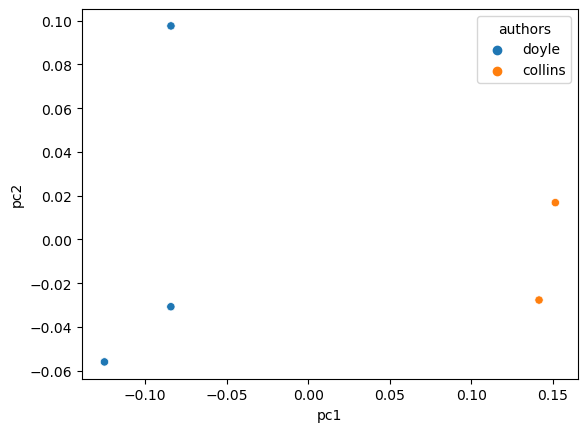

In [61]:
df = pd.DataFrame(data_dictionary)

sns.scatterplot(df, x="pc1", y="pc2", hue="authors")